<a href="https://colab.research.google.com/github/AndreaHernandez5072/CienciaDatos/blob/main/HousePriceEstimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [591]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix, f1_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

# Cargando la data


In [592]:
df = pd.read_csv("train.csv")
dfe=pd.read_csv("Evaluation.csv")

In [593]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,16935,335000.0,2,1.75,1060,1202,2.0,0,bad,acceptable,7,760,300,2003,0,98136,47.5426,-122.388,1060,1493
1,499,437500.0,3,2.50,2120,4500,2.0,0,bad,acceptable,7,2120,0,2000,0,98065,47.5322,-121.880,2530,4816
2,14192,1005000.0,3,2.50,2570,5000,1.0,0,bad,good,8,1480,1090,1940,0,98105,47.6578,-122.285,2420,5484
3,5666,1600000.0,3,2.50,2850,19593,1.5,1,fantastic,acceptable,10,1790,1060,1978,0,98008,47.5894,-122.111,2850,18782
4,11015,186000.0,3,1.75,1460,7967,1.0,0,bad,acceptable,7,1040,420,1977,0,98023,47.3199,-122.374,1460,6835


In [594]:
dfe.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,14697,4,2.50,2700,8810,2.0,0,bad,acceptable,9,2700,0,2004,0,98052,47.7041,-122.116,2730,5100
1,1217,5,3.25,4110,7920,2.0,0,great,acceptable,9,3150,960,1921,0,98122,47.6170,-122.282,3890,7800
2,10447,3,2.00,2500,4080,1.5,0,bad,excellent,7,1680,820,1922,0,98103,47.6813,-122.346,1550,3060
3,18727,2,0.75,900,3527,1.0,0,bad,acceptable,6,900,0,1939,0,98146,47.5083,-122.336,1220,4080
4,10207,3,2.00,2210,6387,1.0,0,bad,acceptable,8,2210,0,2003,0,98003,47.2650,-122.302,2570,6497


# Identificando valores nulos


In [595]:
def display_missing_value(df):
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()),'. (',(df[col].isnull().sum()/df.shape[0])*100,'%)')
    print('\n')

In [596]:
display_missing_value(df)

id column missing values: 0 . ( 0.0 %)
price column missing values: 0 . ( 0.0 %)
bedrooms column missing values: 0 . ( 0.0 %)
bathrooms column missing values: 0 . ( 0.0 %)
sqft_living column missing values: 0 . ( 0.0 %)
sqft_lot column missing values: 0 . ( 0.0 %)
floors column missing values: 0 . ( 0.0 %)
waterfront column missing values: 0 . ( 0.0 %)
view column missing values: 0 . ( 0.0 %)
condition column missing values: 0 . ( 0.0 %)
grade column missing values: 0 . ( 0.0 %)
sqft_above column missing values: 0 . ( 0.0 %)
sqft_basement column missing values: 0 . ( 0.0 %)
yr_built column missing values: 0 . ( 0.0 %)
yr_renovated column missing values: 0 . ( 0.0 %)
zipcode column missing values: 0 . ( 0.0 %)
lat column missing values: 0 . ( 0.0 %)
long column missing values: 0 . ( 0.0 %)
sqft_living15 column missing values: 0 . ( 0.0 %)
sqft_lot15 column missing values: 0 . ( 0.0 %)




In [597]:
display_missing_value(dfe)

id column missing values: 0 . ( 0.0 %)
bedrooms column missing values: 0 . ( 0.0 %)
bathrooms column missing values: 0 . ( 0.0 %)
sqft_living column missing values: 0 . ( 0.0 %)
sqft_lot column missing values: 0 . ( 0.0 %)
floors column missing values: 0 . ( 0.0 %)
waterfront column missing values: 0 . ( 0.0 %)
view column missing values: 0 . ( 0.0 %)
condition column missing values: 0 . ( 0.0 %)
grade column missing values: 0 . ( 0.0 %)
sqft_above column missing values: 0 . ( 0.0 %)
sqft_basement column missing values: 0 . ( 0.0 %)
yr_built column missing values: 0 . ( 0.0 %)
yr_renovated column missing values: 0 . ( 0.0 %)
zipcode column missing values: 0 . ( 0.0 %)
lat column missing values: 0 . ( 0.0 %)
long column missing values: 0 . ( 0.0 %)
sqft_living15 column missing values: 0 . ( 0.0 %)
sqft_lot15 column missing values: 0 . ( 0.0 %)




In [598]:
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [599]:
dfe.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

En este caso, no hay campos nulos

# Explorando la data

In [600]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000
mean,10834.771433,5.399958e+05,3.368243,2.113385,2079.628055,1.510525e+04,1.494666,0.007294,7.659844,1786.855207,292.772849,1970.971586,85.514398,98078.080344,47.560525,-122.214107,1985.357629,12712.953024
std,6237.186244,3.646536e+05,0.934019,0.769465,917.994443,4.215087e+04,0.540669,0.085096,1.177113,828.180612,442.699016,29.383190,404.236968,53.407807,0.138310,0.140878,685.955695,27257.274694
min,0.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,460.000000,651.000000
25%,5434.000000,3.223000e+05,3.000000,1.500000,1420.000000,5.037500e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472400,-122.329000,1480.000000,5100.000000
50%,10875.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.614000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.231000,1830.000000,7620.000000
75%,16222.500000,6.450000e+05,4.000000,2.500000,2550.000000,1.065350e+04,2.000000,0.000000,8.000000,2210.000000,570.000000,1997.000000,0.000000,98118.000000,47.678300,-122.124000,2360.000000,10076.000000
max,21612.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [601]:
dfe.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,10642.964837,3.385564,2.122532,2081.439235,15116.697717,1.492289,0.008945,7.640037,1797.091610,284.347625,1971.195250,78.100247,98077.143430,47.557378,-122.212702,1993.323257,13082.964837
std,6249.592818,0.907313,0.774181,921.107089,37016.630589,0.536196,0.094169,1.166080,827.656744,441.871798,29.321734,386.866537,54.054027,0.139985,0.140560,682.250199,27570.589561
min,2.000000,0.000000,0.500000,390.000000,609.000000,1.000000,0.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.176400,-122.504000,399.000000,809.000000
25%,5298.250000,3.000000,1.750000,1430.000000,5100.000000,1.000000,0.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98031.000000,47.461900,-122.324000,1494.000000,5120.000000
50%,10543.000000,3.000000,2.250000,1920.000000,7645.500000,1.500000,0.000000,7.000000,1580.000000,0.000000,1976.000000,0.000000,98065.000000,47.570200,-122.228000,1860.000000,7635.000000
75%,16098.250000,4.000000,2.500000,2520.000000,10800.000000,2.000000,0.000000,8.000000,2230.000000,540.000000,1997.000000,0.000000,98117.000000,47.676700,-122.127250,2370.000000,10125.000000
max,21605.000000,10.000000,6.500000,10040.000000,623779.000000,3.500000,1.000000,13.000000,7680.000000,2600.000000,2015.000000,2015.000000,98199.000000,47.777100,-121.316000,5790.000000,422967.000000


In [602]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18371 entries, 0 to 18370
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18371 non-null  int64  
 1   price          18371 non-null  float64
 2   bedrooms       18371 non-null  int64  
 3   bathrooms      18371 non-null  float64
 4   sqft_living    18371 non-null  int64  
 5   sqft_lot       18371 non-null  int64  
 6   floors         18371 non-null  float64
 7   waterfront     18371 non-null  int64  
 8   view           18371 non-null  object 
 9   condition      18371 non-null  object 
 10  grade          18371 non-null  int64  
 11  sqft_above     18371 non-null  int64  
 12  sqft_basement  18371 non-null  int64  
 13  yr_built       18371 non-null  int64  
 14  yr_renovated   18371 non-null  int64  
 15  zipcode        18371 non-null  int64  
 16  lat            18371 non-null  float64
 17  long           18371 non-null  float64
 18  sqft_l

Los datos a tratar son view y condition.

**View** tiene categorias bad (1), regular(2), good(3) y great(4).

**condition** tiene categoria bad(1), regular(2), acceptable(3), good(4), excelent(5)



In [603]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3242 non-null   int64  
 1   bedrooms       3242 non-null   int64  
 2   bathrooms      3242 non-null   float64
 3   sqft_living    3242 non-null   int64  
 4   sqft_lot       3242 non-null   int64  
 5   floors         3242 non-null   float64
 6   waterfront     3242 non-null   int64  
 7   view           3242 non-null   object 
 8   condition      3242 non-null   object 
 9   grade          3242 non-null   int64  
 10  sqft_above     3242 non-null   int64  
 11  sqft_basement  3242 non-null   int64  
 12  yr_built       3242 non-null   int64  
 13  yr_renovated   3242 non-null   int64  
 14  zipcode        3242 non-null   int64  
 15  lat            3242 non-null   float64
 16  long           3242 non-null   float64
 17  sqft_living15  3242 non-null   int64  
 18  sqft_lot

# Encoding variables categoricas

In [604]:
print("-"*40)
print("Train:\n")
print(df["view"].unique())
print("-"*40)
print("Evaluation:\n")
print(dfe["view"].unique())

----------------------------------------
Train:

['bad' 'fantastic' 'good' 'great' 'regular']
----------------------------------------
Evaluation:

['bad' 'great' 'regular' 'good' 'fantastic']


In [605]:
print("-"*40)
print("Train:\n")
print(df["condition"].unique())
print("-"*40)
print("Evaluation:\n")
print(dfe["condition"].unique())

----------------------------------------
Train:

['acceptable' 'good' 'excellent' 'regular' 'bad']
----------------------------------------
Evaluation:

['acceptable' 'excellent' 'good' 'regular' 'bad']


In [606]:
reemplazoCategorias={
    "view": {"bad":1,"regular":2,"good":3,"great":4,"fantastic":5},
    "condition": {"bad":1,"regular":2,"acceptable":3,"good":4,"excellent":5}
}

df = df.replace(reemplazoCategorias)
dfe = dfe.replace(reemplazoCategorias)

In [607]:
print("-"*80)
print("Train:\n")
print(df.info())
print("-"*80)
print("Evaluation:\n")
print(dfe.info())

--------------------------------------------------------------------------------
Train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18371 entries, 0 to 18370
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18371 non-null  int64  
 1   price          18371 non-null  float64
 2   bedrooms       18371 non-null  int64  
 3   bathrooms      18371 non-null  float64
 4   sqft_living    18371 non-null  int64  
 5   sqft_lot       18371 non-null  int64  
 6   floors         18371 non-null  float64
 7   waterfront     18371 non-null  int64  
 8   view           18371 non-null  int64  
 9   condition      18371 non-null  int64  
 10  grade          18371 non-null  int64  
 11  sqft_above     18371 non-null  int64  
 12  sqft_basement  18371 non-null  int64  
 13  yr_built       18371 non-null  int64  
 14  yr_renovated   18371 non-null  int64  
 15  zipcode        18371 non-null  int64  
 16  lat  

In [608]:
print("-"*40)
print("Train:\n")
print(df["condition"].unique())
print("-"*40)
print("Evaluation:\n")
print(dfe["condition"].unique())

----------------------------------------
Train:

[3 4 5 2 1]
----------------------------------------
Evaluation:

[3 5 4 2 1]


In [609]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000
mean,10834.771433,5.399958e+05,3.368243,2.113385,2079.628055,1.510525e+04,1.494666,0.007294,1.233520,3.411409,7.659844,1786.855207,292.772849,1970.971586,85.514398,98078.080344,47.560525,-122.214107,1985.357629,12712.953024
std,6237.186244,3.646536e+05,0.934019,0.769465,917.994443,4.215087e+04,0.540669,0.085096,0.765271,0.653810,1.177113,828.180612,442.699016,29.383190,404.236968,53.407807,0.138310,0.140878,685.955695,27257.274694
min,0.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,460.000000,651.000000
25%,5434.000000,3.223000e+05,3.000000,1.500000,1420.000000,5.037500e+03,1.000000,0.000000,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472400,-122.329000,1480.000000,5100.000000
50%,10875.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.614000e+03,1.500000,0.000000,1.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.231000,1830.000000,7620.000000
75%,16222.500000,6.450000e+05,4.000000,2.500000,2550.000000,1.065350e+04,2.000000,0.000000,1.000000,4.000000,8.000000,2210.000000,570.000000,1997.000000,0.000000,98118.000000,47.678300,-122.124000,2360.000000,10076.000000
max,21612.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Outliers

In [610]:
def CuantificaOutliers (dataset):
  for col in dataset.columns:
    q1, q3 = np.percentile(dataset[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outlier = dataset[(dataset[col] < lower_bound)
                  | (dataset[col] > upper_bound)]
    print(col,":  (",outlier.shape[0]," / ",dataset.shape[0]," )  ",(outlier.shape[0] /  dataset.shape[0])*100,"%")

In [611]:
CuantificaOutliers(df)

id :  ( 0  /  18371  )   0.0 %
price :  ( 966  /  18371  )   5.258287518371346 %
bedrooms :  ( 466  /  18371  )   2.5366066082412497 %
bathrooms :  ( 222  /  18371  )   1.2084263240977628 %
sqft_living :  ( 482  /  18371  )   2.623700397365413 %
sqft_lot :  ( 2063  /  18371  )   11.229655435196777 %
floors :  ( 0  /  18371  )   0.0 %
waterfront :  ( 134  /  18371  )   0.7294104839148658 %
view :  ( 1801  /  18371  )   9.803494638288607 %
condition :  ( 29  /  18371  )   0.15785749278754557 %
grade :  ( 1639  /  18371  )   8.921670023406456 %
sqft_above :  ( 511  /  18371  )   2.7815578901529583 %
sqft_basement :  ( 397  /  18371  )   2.1610146426432966 %
yr_built :  ( 0  /  18371  )   0.0 %
yr_renovated :  ( 787  /  18371  )   4.283925752544772 %
zipcode :  ( 0  /  18371  )   0.0 %
lat :  ( 3  /  18371  )   0.016330085460780578 %
long :  ( 214  /  18371  )   1.1648794295356812 %
sqft_living15 :  ( 447  /  18371  )   2.4331827336563063 %
sqft_lot15 :  ( 1869  /  18371  )   10.1736432420

In [612]:
CuantificaOutliers(dfe)

id :  ( 0  /  3242  )   0.0 %
bedrooms :  ( 80  /  3242  )   2.4676125848241828 %
bathrooms :  ( 91  /  3242  )   2.8069093152375078 %
sqft_living :  ( 91  /  3242  )   2.8069093152375078 %
sqft_lot :  ( 368  /  3242  )   11.35101789019124 %
floors :  ( 0  /  3242  )   0.0 %
waterfront :  ( 29  /  3242  )   0.8945095619987662 %
view :  ( 323  /  3242  )   9.962985811227638 %
condition :  ( 1  /  3242  )   0.030845157310302282 %
grade :  ( 272  /  3242  )   8.389882788402222 %
sqft_above :  ( 99  /  3242  )   3.053670573719926 %
sqft_basement :  ( 91  /  3242  )   2.8069093152375078 %
yr_built :  ( 0  /  3242  )   0.0 %
yr_renovated :  ( 127  /  3242  )   3.9173349784083897 %
zipcode :  ( 0  /  3242  )   0.0 %
lat :  ( 0  /  3242  )   0.0 %
long :  ( 41  /  3242  )   1.2646514497223937 %
sqft_living15 :  ( 74  /  3242  )   2.282541640962369 %
sqft_lot15 :  ( 325  /  3242  )   10.024676125848242 %


Tratando los outliers

In [613]:
def ModificaOutliers (dataset,cols):
  for col in cols:
    q1, q3 = np.percentile(dataset[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    dataset[col]=np.where(dataset[col]>upper_bound,upper_bound,np.where(dataset[col]<lower_bound,lower_bound,dataset[col]))
  return dataset

In [614]:
df = ModificaOutliers(df,(["price","bedrooms","bathrooms","sqft_living","sqft_lot","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_renovated","lat","long","sqft_living15","sqft_lot15"]))

In [615]:
dfe = ModificaOutliers(dfe,(["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_renovated","long","sqft_living15","sqft_lot15","long"]))

In [616]:
CuantificaOutliers(df)

id :  ( 0  /  18371  )   0.0 %
price :  ( 0  /  18371  )   0.0 %
bedrooms :  ( 0  /  18371  )   0.0 %
bathrooms :  ( 0  /  18371  )   0.0 %
sqft_living :  ( 0  /  18371  )   0.0 %
sqft_lot :  ( 0  /  18371  )   0.0 %
floors :  ( 0  /  18371  )   0.0 %
waterfront :  ( 0  /  18371  )   0.0 %
view :  ( 0  /  18371  )   0.0 %
condition :  ( 0  /  18371  )   0.0 %
grade :  ( 0  /  18371  )   0.0 %
sqft_above :  ( 0  /  18371  )   0.0 %
sqft_basement :  ( 0  /  18371  )   0.0 %
yr_built :  ( 0  /  18371  )   0.0 %
yr_renovated :  ( 0  /  18371  )   0.0 %
zipcode :  ( 0  /  18371  )   0.0 %
lat :  ( 0  /  18371  )   0.0 %
long :  ( 0  /  18371  )   0.0 %
sqft_living15 :  ( 0  /  18371  )   0.0 %
sqft_lot15 :  ( 0  /  18371  )   0.0 %


In [617]:
CuantificaOutliers(dfe)

id :  ( 0  /  3242  )   0.0 %
bedrooms :  ( 0  /  3242  )   0.0 %
bathrooms :  ( 0  /  3242  )   0.0 %
sqft_living :  ( 0  /  3242  )   0.0 %
sqft_lot :  ( 0  /  3242  )   0.0 %
floors :  ( 0  /  3242  )   0.0 %
waterfront :  ( 0  /  3242  )   0.0 %
view :  ( 0  /  3242  )   0.0 %
condition :  ( 0  /  3242  )   0.0 %
grade :  ( 0  /  3242  )   0.0 %
sqft_above :  ( 0  /  3242  )   0.0 %
sqft_basement :  ( 0  /  3242  )   0.0 %
yr_built :  ( 0  /  3242  )   0.0 %
yr_renovated :  ( 0  /  3242  )   0.0 %
zipcode :  ( 0  /  3242  )   0.0 %
lat :  ( 0  /  3242  )   0.0 %
long :  ( 0  /  3242  )   0.0 %
sqft_living15 :  ( 0  /  3242  )   0.0 %
sqft_lot15 :  ( 0  /  3242  )   0.0 %


# Correlación entre datos

In [618]:
def identificarCorrelacion(dataset):
  f = dataset.corr()
  mask=np.triu(np.ones_like(f))
  #Ajustando el tamaño para que se vea mejor
  plt.figure(figsize=[18,11])
  sns.heatmap(f,annot=True,cmap="coolwarm",mask=mask,fmt=".2f",square=True, linewidths=.6)
  plt.title("Matriz de Correlación")
  plt.show()

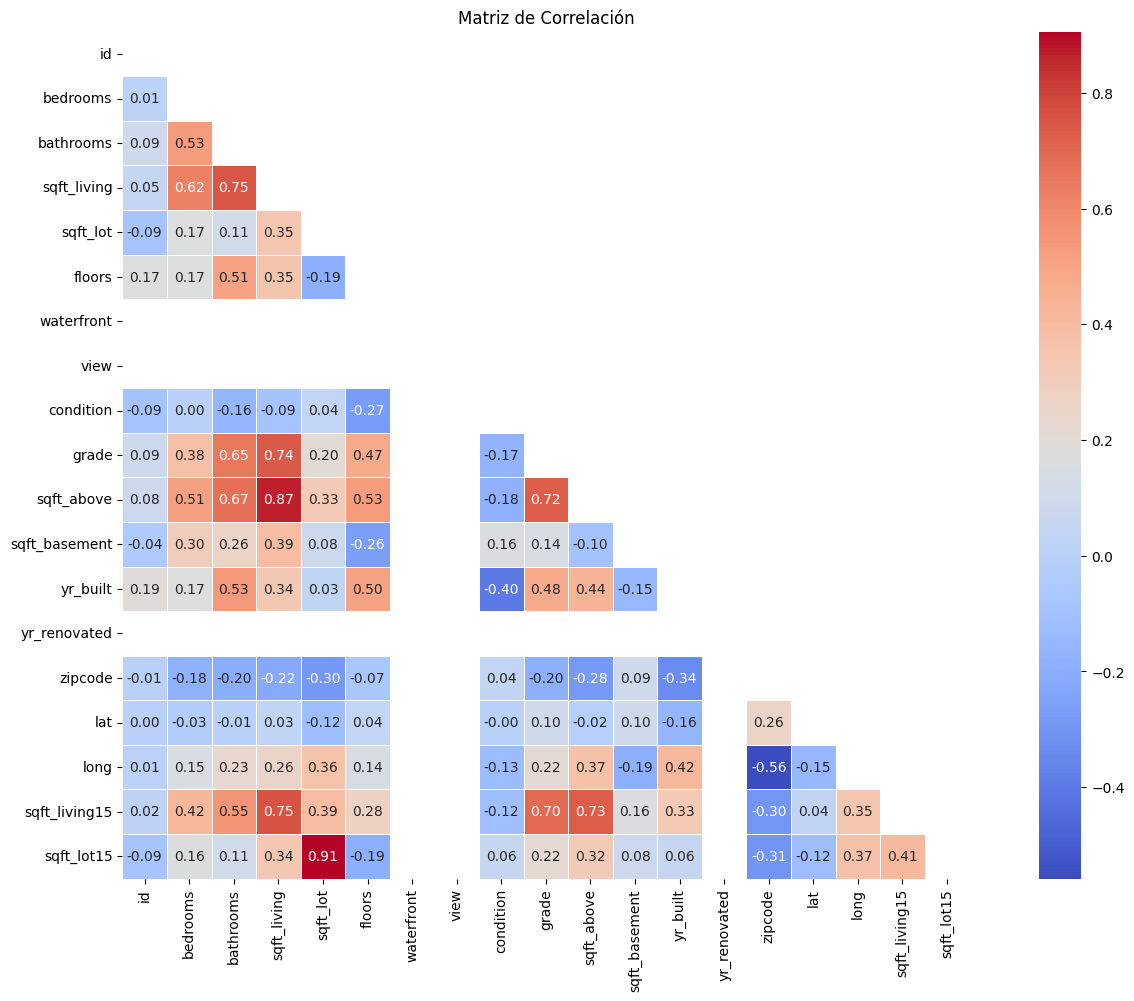

In [619]:
identificarCorrelacion(dfe)

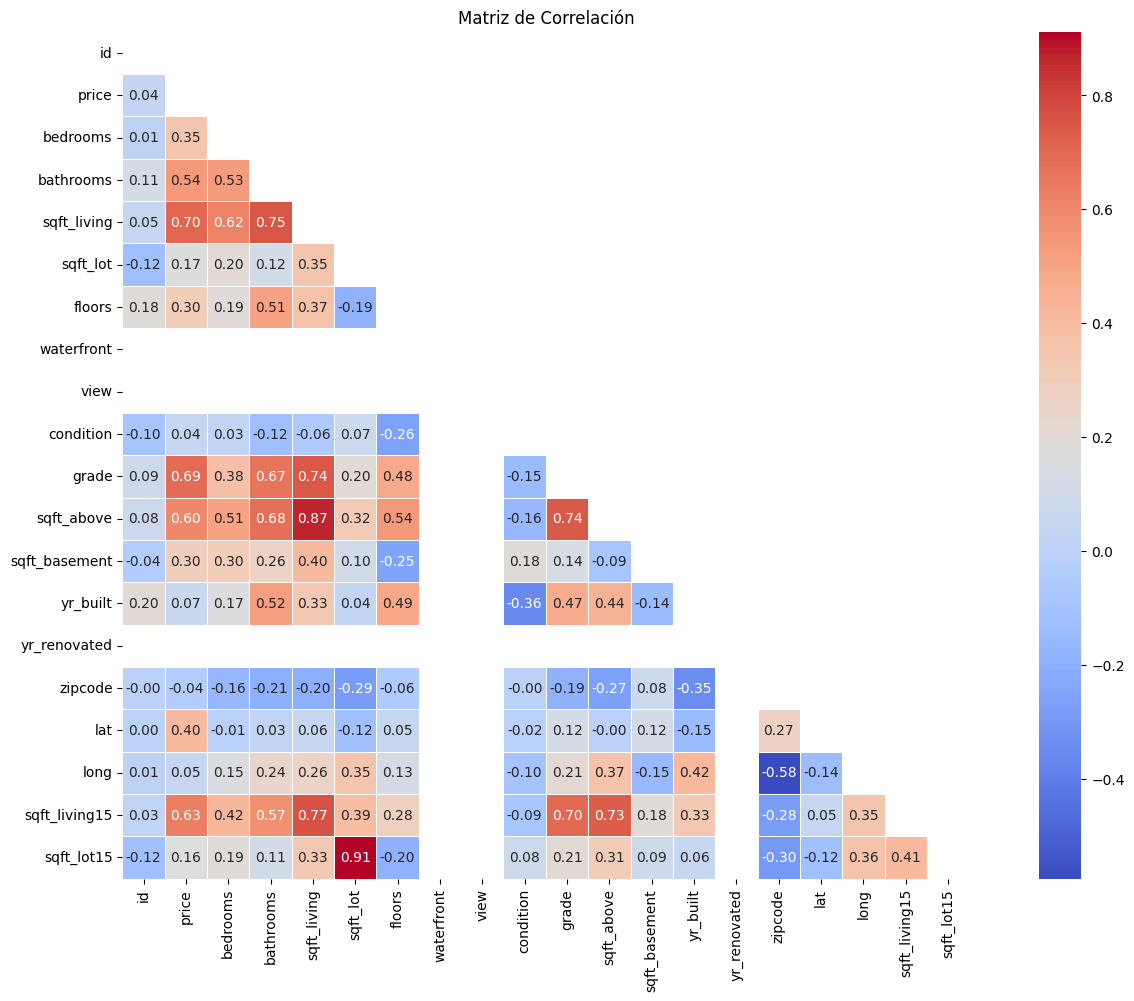

In [620]:
identificarCorrelacion(df)

# Normalización de datos

In [621]:
#Usando método de máximo y mínimo
def normalizacionMinMax (dataset,column):
  dataset[column] = (dataset[column] - dataset[column].mean()) / (dataset[column].max() - dataset[column].min())
  return dataset[column]

In [622]:
df1=df
#Train data
df1["price"]=normalizacionMinMax(df1,"price")
df1["sqft_living"]=normalizacionMinMax(df1,"sqft_living")
df1["sqft_lot"]=normalizacionMinMax(df1,"sqft_lot")
df1["sqft_above"]=normalizacionMinMax(df1,"sqft_above")
df1["sqft_basement"]=normalizacionMinMax(df1,"sqft_basement")
df1["yr_built"]=normalizacionMinMax(df1,"yr_built")
df1["zipcode"]=normalizacionMinMax(df1,"zipcode")
df1["lat"]=normalizacionMinMax(df1,"lat")
df1["long"]=normalizacionMinMax(df1,"long")
df1["sqft_living15"]=normalizacionMinMax(df1,"sqft_living15")
df1["sqft_lot15"]=normalizacionMinMax(df1,"sqft_lot15")

In [623]:
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,18371.000000,1.837100e+04,18371.000000,18371.000000,1.837100e+04,1.837100e+04,18371.000000,18371.0,18371.0,18371.000000,18371.000000,1.837100e+04,1.837100e+04,1.837100e+04,18371.0,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04
mean,10834.771433,-6.961934e-18,3.360623,2.105084,4.863685e-17,-5.107836e-17,1.494666,0.0,1.0,3.412199,7.600920,1.213504e-17,-4.061128e-18,-1.192231e-16,0.0,2.656573e-14,-7.929353e-16,1.820468e-14,-2.233621e-17,-5.173104e-17
std,6237.186244,2.370570e-01,0.855396,0.741712,2.126596e-01,2.707103e-01,0.540669,0.0,0.0,0.651194,1.001846,2.215977e-01,2.942312e-01,2.555060e-01,0.0,2.697364e-01,2.252387e-01,1.956713e-01,2.021667e-01,2.583926e-01
min,0.000000,-4.144095e-01,1.500000,0.000000,-4.471591e-01,-4.400747e-01,1.000000,0.0,1.0,1.500000,5.500000,-4.284488e-01,-2.007584e-01,-6.171442e-01,0.0,-3.892947e-01,-6.464868e-01,-4.326563e-01,-4.703083e-01,-4.521079e-01
25%,5434.000000,-1.797907e-01,3.000000,1.500000,-1.614448e-01,-1.966421e-01,1.000000,0.0,1.0,3.000000,7.000000,-1.675793e-01,-2.007584e-01,-1.736660e-01,0.0,-2.276785e-01,-1.435147e-01,-1.621937e-01,-1.535381e-01,-1.886820e-01
50%,10875.000000,-5.863893e-02,3.000000,2.250000,-3.755101e-02,-5.780339e-02,1.500000,0.0,1.0,3.000000,7.000000,-6.033288e-02,-2.007584e-01,3.502969e-02,0.0,-6.606234e-02,1.868703e-02,-2.269188e-02,-4.484243e-02,-3.947248e-02
75%,16222.500000,1.263618e-01,4.000000,2.500000,1.242695e-01,1.059848e-01,2.000000,0.0,1.0,4.000000,8.000000,1.280729e-01,1.992416e-01,2.263340e-01,0.0,2.016144e-01,1.918000e-01,1.296213e-01,1.197538e-01,1.059476e-01
max,21612.000000,5.855905e-01,5.500000,4.000000,5.528409e-01,5.599253e-01,3.500000,0.0,1.0,5.000000,9.500000,5.715512e-01,7.992416e-01,3.828558e-01,0.0,6.107053e-01,3.535132e-01,5.673437e-01,5.296917e-01,5.478921e-01


In [624]:
dfe1=dfe
#Test data
#dfe1["price"]=normalizacionMinMax(dfe,"price")
dfe1["sqft_living"]=normalizacionMinMax(dfe1,"sqft_living")
dfe1["sqft_lot"]=normalizacionMinMax(dfe1,"sqft_lot")
dfe1["sqft_above"]=normalizacionMinMax(dfe1,"sqft_above")
dfe1["sqft_basement"]=normalizacionMinMax(dfe1,"sqft_basement")
dfe1["yr_built"]=normalizacionMinMax(dfe1,"yr_built")
dfe1["zipcode"]=normalizacionMinMax(dfe1,"zipcode")
dfe1["lat"]=normalizacionMinMax(dfe1,"lat")
dfe1["long"]=normalizacionMinMax(dfe1,"long")
dfe1["sqft_living15"]=normalizacionMinMax(dfe1,"sqft_living15")
dfe1["sqft_lot15"]=normalizacionMinMax(dfe1,"sqft_lot15")

In [625]:
dfe1.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3242.000000,3242.000000,3242.000000,3.242000e+03,3.242000e+03,3242.000000,3242.0,3242.0,3242.000000,3242.000000,3.242000e+03,3.242000e+03,3.242000e+03,3242.0,3.242000e+03,3.242000e+03,3.242000e+03,3.242000e+03,3.242000e+03
mean,10642.964837,3.375077,2.102984,-5.506597e-17,-6.575041e-18,1.492289,0.0,1.0,3.398365,7.585441,1.561572e-17,-5.205241e-18,-2.509474e-16,0.0,3.282959e-14,9.981734e-15,2.236363e-14,3.177936e-17,3.999816e-17
std,6249.592818,0.846778,0.717457,2.199197e-01,2.727769e-01,0.536196,0.0,0.0,0.632544,0.997812,2.257448e-01,3.033775e-01,2.549716e-01,0.0,2.730001e-01,2.330357e-01,2.026565e-01,1.962156e-01,2.588871e-01
min,2.000000,1.500000,0.625000,-4.422416e-01,-4.359732e-01,1.000000,0.0,1.0,1.500000,5.500000,-4.102375e-01,-2.032815e-01,-6.190891e-01,0.0,-3.845628e-01,-6.342234e-01,-4.317307e-01,-4.818182e-01,-4.488832e-01
25%,5298.250000,3.000000,1.750000,-1.660131e-01,-1.963382e-01,1.000000,0.0,1.0,3.000000,7.000000,-1.709465e-01,-2.032815e-01,-1.669152e-01,0.0,-2.330476e-01,-1.589445e-01,-1.638237e-01,-1.484848e-01,-1.926345e-01
50%,10543.000000,3.000000,2.250000,-3.586706e-02,-6.051299e-02,1.500000,0.0,1.0,3.000000,7.000000,-5.868653e-02,-2.032815e-01,4.178044e-02,0.0,-6.133045e-02,2.134514e-02,-2.093999e-02,-3.706931e-02,-4.314124e-02
75%,16098.250000,4.000000,2.500000,1.234955e-01,1.078078e-01,2.000000,0.0,1.0,4.000000,8.000000,1.333371e-01,1.967185e-01,2.243891e-01,0.0,2.012958e-01,1.986383e-01,1.290135e-01,1.181818e-01,1.048660e-01
max,21605.000000,5.500000,3.625000,5.577584e-01,5.640268e-01,3.500000,0.0,1.0,5.000000,9.500000,5.897625e-01,7.967185e-01,3.809109e-01,0.0,6.154372e-01,3.657766e-01,5.682693e-01,5.181818e-01,5.511168e-01


# Observando si mejoro la correlación

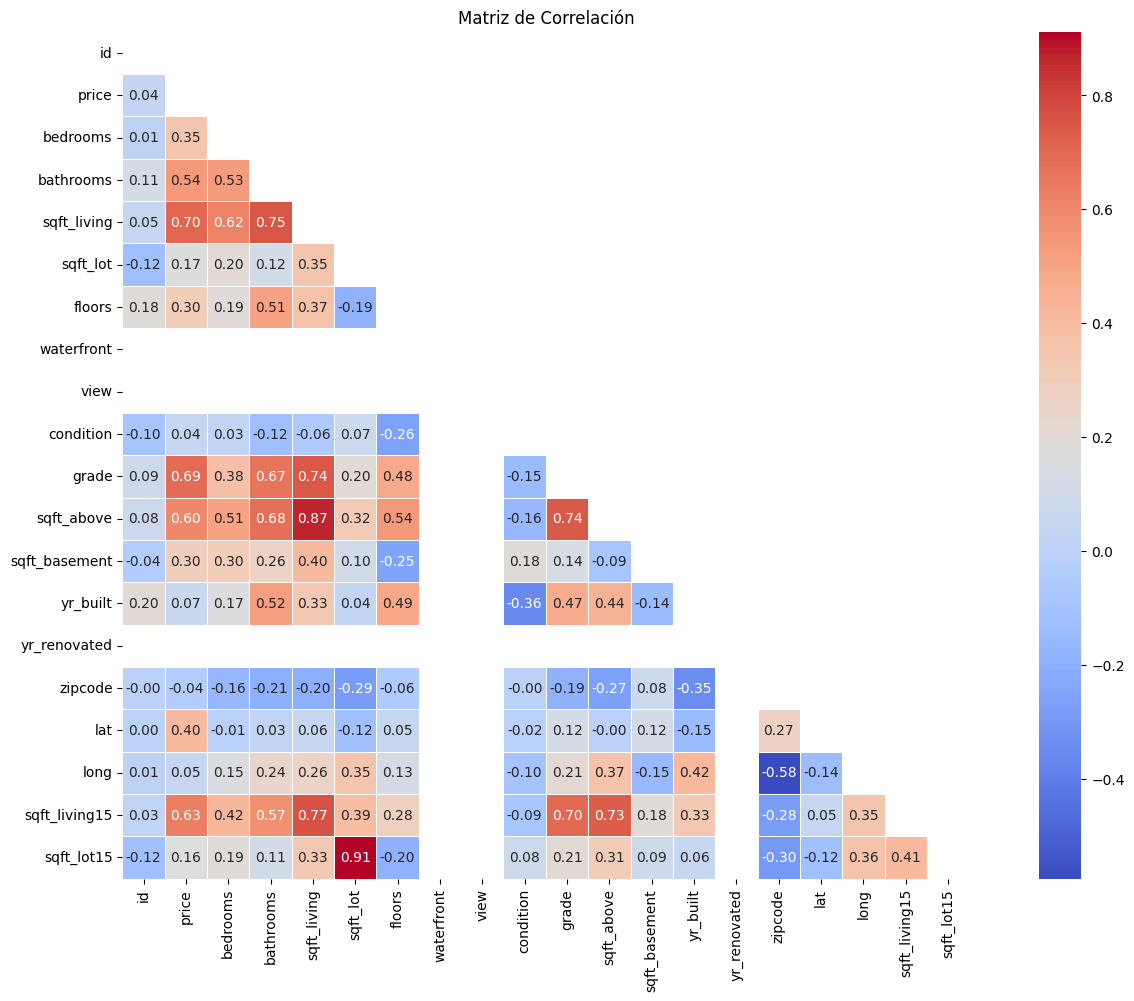

In [626]:
identificarCorrelacion(df1)

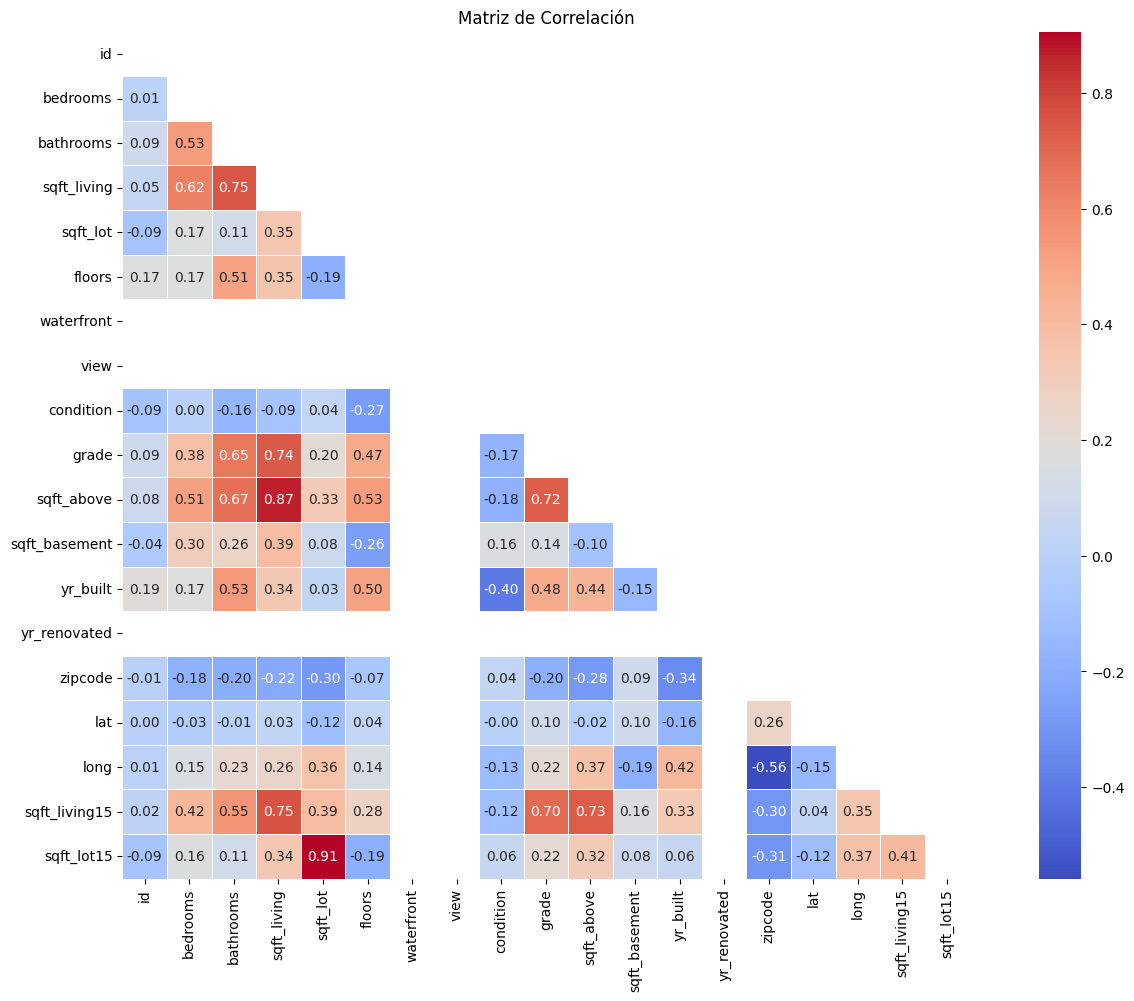

In [627]:
identificarCorrelacion(dfe1)

# Almacenando la data limpia

In [628]:
clean_data_train=df1
clean_data_test=dfe1
#Guardando la data limpia en csv
df.to_csv("clean_data_train.csv",index=False)
dfe.to_csv("clean_data_test.csv",index=False)

# Variables de análisis

In [629]:
x_train=clean_data_train.drop(["price"],axis=1)
y_train=clean_data_train["price"]

#x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=25,test_size=0.2)
x_evaluation=clean_data_test

# Regresión lineal

In [630]:
#Entrenar el modelo
modelLR = LinearRegression().fit(x_train,y_train)
# Efectuar Prediccion
y_hat = modelLR.predict(x_evaluation)

# Evaluar el modelo
#print("Mean square error: ", mean_squared_error(y_test,y_hat))
#print("Mean absolute error: ", mean_absolute_error(y_test,y_hat))
#print("Mean square error: ", r2_score(y_test,y_hat))

# Regresión polinomica

In [631]:
polyfit = PolynomialFeatures(degree=2)
x_train_poly = polyfit.fit_transform(x_train)
x_test_poly = polyfit.fit_transform(x_evaluation)

In [632]:
lrpoly=LinearRegression()
lrpoly.fit(x_train_poly,y_train)
#Evaluamos el modelo
y_hat=lrpoly.predict(x_test_poly)
#print("Mean square error: ", mean_squared_error(y_test,y_hat))
#print("Mean absolute error: ", mean_absolute_error(y_test,y_hat))
#print("Mean square error: ", r2_score(y_test,y_hat))
#Mean square error es la medida que usara la pagina para evaluar

# SVC

In [ ]:
svmmodel=SVC(kernel='linear',C=1000,gamma="auto",random_state=0)
#Entrenamiento del modelo
svmmodel.fit(x_train.round(),y_train.round())
#Proabndo las prediciones
y_hat=svmmodel.predict(x_evaluation)
y_hat
#Evaluar el modelo
#print(confusion_matrix(y_test.round(),y_hat.round()))
#print("\n")
#print(classification_report(y_test.round(),y_hat.round()))

# Subir al portal

In [633]:
dfresult=pd.DataFrame({"id":x_evaluation["id"],"VALUE":y_hat})
dfresult.to_csv("resultado.csv",index=False)

In [634]:
pd.read_csv("resultado.csv")

,id,VALUE
0,14697,0.229434
1,1217,0.636382
2,10447,0.183423
3,18727,-0.260379
4,10207,-0.282868
...,...,...
3237,8460,-0.313524
3238,16627,0.167734
3239,13603,0.101592
3240,616,-0.186358
